<h1>Sentiment Analysis</h1>

Import libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.datasets import imdb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading Dataset

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocessing

In [6]:
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

X_train = [' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in X_train]
X_test = [' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in X_test]

y_train = pd.DataFrame(y_train, columns=['sentiment'])
y_test = pd.DataFrame(y_test, columns=['sentiment'])

Training the model

In [7]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words=stopwords.words('english'))),
    ('clf', MultinomialNB())
])

model.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', MultinomialNB())])

Evaluation

Accuracy: 0.84632
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.83      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



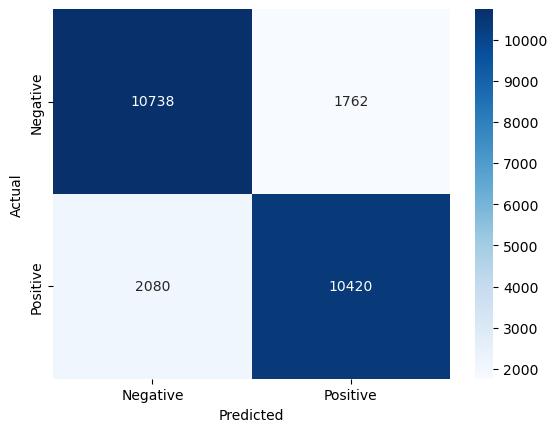

In [8]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predictions

In [9]:
new_reviews = ["This movie was fantastic! I loved the plot and the acting was superb.",
               "Terrible movie. It was a waste of time, and I hated the script."]

predictions = model.predict(new_reviews)
print(predictions)

[1 0]
